In [161]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

abreviationToCountry = { "BE" : "Beligum",
                         "BG" : "Bulgaria",
                         "CZ" : "Czechia",
                         "DK" : "Denmark",
                         "DE" : "Germany",
                         "EE" : "Estonia",
                         "IE" : "Ireland",
                         "EL" : "Greece",
                         "ES" : "Spain",
                         "FR" : "France",
                         "HR" : "Croatia",
                         "IT" : "Italy",
                         "CY" : "Cyprus",
                         "LV" : "Latvia",
                         "LT" : "Lithuania",
                         "LU" : "Luxembourg",
                         "HU" : "Hungary",
                         "MT" : "Malta",
                         "NL" : "Netherlands",
                         "AT" : "Austria",
                         "PL" : "Poland",
                         "PT" : "Portugal",
                         "RO" : "Romania",
                         "SI" : "Slovenia",
                         "SK" : "Slovakia",
                         "FI" : "Finland",
                         "SE" : "Sweden",
                         "IS" : "Iceland",
                         "NO" : "Norway",
                         "CH" : "Switzerland",
                         "BA" : "Bosnia and Herzegovina",
                         "RS" : "Serbia",
                         "TR" : "Turkiye"
                         }

dfTsv = pd.read_csv('C:\data analysis best country in europe\estat_lfsa_pfganwsm.tsv\estat_lfsa_pfganwsm.tsv', sep='\t')

dfTsvLeft = dfTsv.iloc[:, 0].str.split(',', expand=True)
dfTsvLeft.columns = dfTsv.columns[0].split(',')

dfTsv.drop(dfTsv.columns[[0]], axis=1, inplace=True)

dfMerged = pd.concat([dfTsvLeft, dfTsv], axis=1)

dfMerged.rename(columns={dfMerged.columns[7]: 'geo'}, inplace=True)
dfMerged.rename(columns={'2023 ' : '2023'}, inplace=True)
dfMerged.rename(columns={'2021 ' : '2021'}, inplace=True)

dfMerged = dfMerged[~dfMerged['2021'].str.contains(":") &
                    ~dfMerged['2023'].str.contains(":")]

charactersToRemove = ['b','d','u',' ']

for character in charactersToRemove :
    dfMerged['2021'] = dfMerged['2021'].str.replace(character, '')
    dfMerged['2023'] = dfMerged['2023'].str.replace(character, '')

dfMerged.replace({"geo": abreviationToCountry}, inplace=True)

dfMerged['2023'] = dfMerged['2023'].astype(float)

citizensTokeep = ["TOTAL","NEU27_2020_FOR","EU27_2020_FOR"]

dfMerged = dfMerged[dfMerged['wstatus'] == "EMP"]
dfMerged = dfMerged[dfMerged['citizen'].isin(citizensTokeep)]
dfMerged = dfMerged[dfMerged['geo'] != "EA20"]
dfMerged = dfMerged[dfMerged['geo'] != "EU27_2020"]

abreviationToCitizen = {"TOTAL" : "All", "NEU27_2020_FOR" : "Non EU", "EU27_2020_FOR" : "EU"}

dfMerged.replace({"citizen": abreviationToCitizen}, inplace=True)

dfMerged = dfMerged[['citizen','geo','2023']].groupby(['geo','citizen']).sum()

dfMerged.reset_index(inplace=True)

quartiles = dfMerged['2023'].quantile([0.25,0.5,0.75])

dfMerged = dfMerged[dfMerged['2023'] > quartiles[0.25]]

dfMerged['2023'] = round(dfMerged['2023'] / 10000,2)

dfMerged = dfMerged.sort_values(by=['2023'], ascending=False)

top10Countries = dfMerged[dfMerged['citizen'] == "All"].head(10)

dfMerged = dfMerged[dfMerged['geo'].isin(top10Countries.geo.unique())]

graph = so.Plot(data = dfMerged,x = dfMerged["2023"], y = dfMerged["geo"], color = "citizen").add(so.Bar(),so.Dodge()).add(so.Text(color="w", halign="right"),so.Dodge(by=["color"]),  text="2023")

dfMerged


,geo,citizen,2023
28,Germany,All,16.84
71,Spain,All,9.09
25,France,All,6.97
40,Italy,All,6.95
30,Germany,Non EU,5.73
29,Germany,EU,5.14
73,Spain,Non EU,4.16
42,Italy,Non EU,3.44
53,Netherlands,All,2.74
27,France,Non EU,2.68


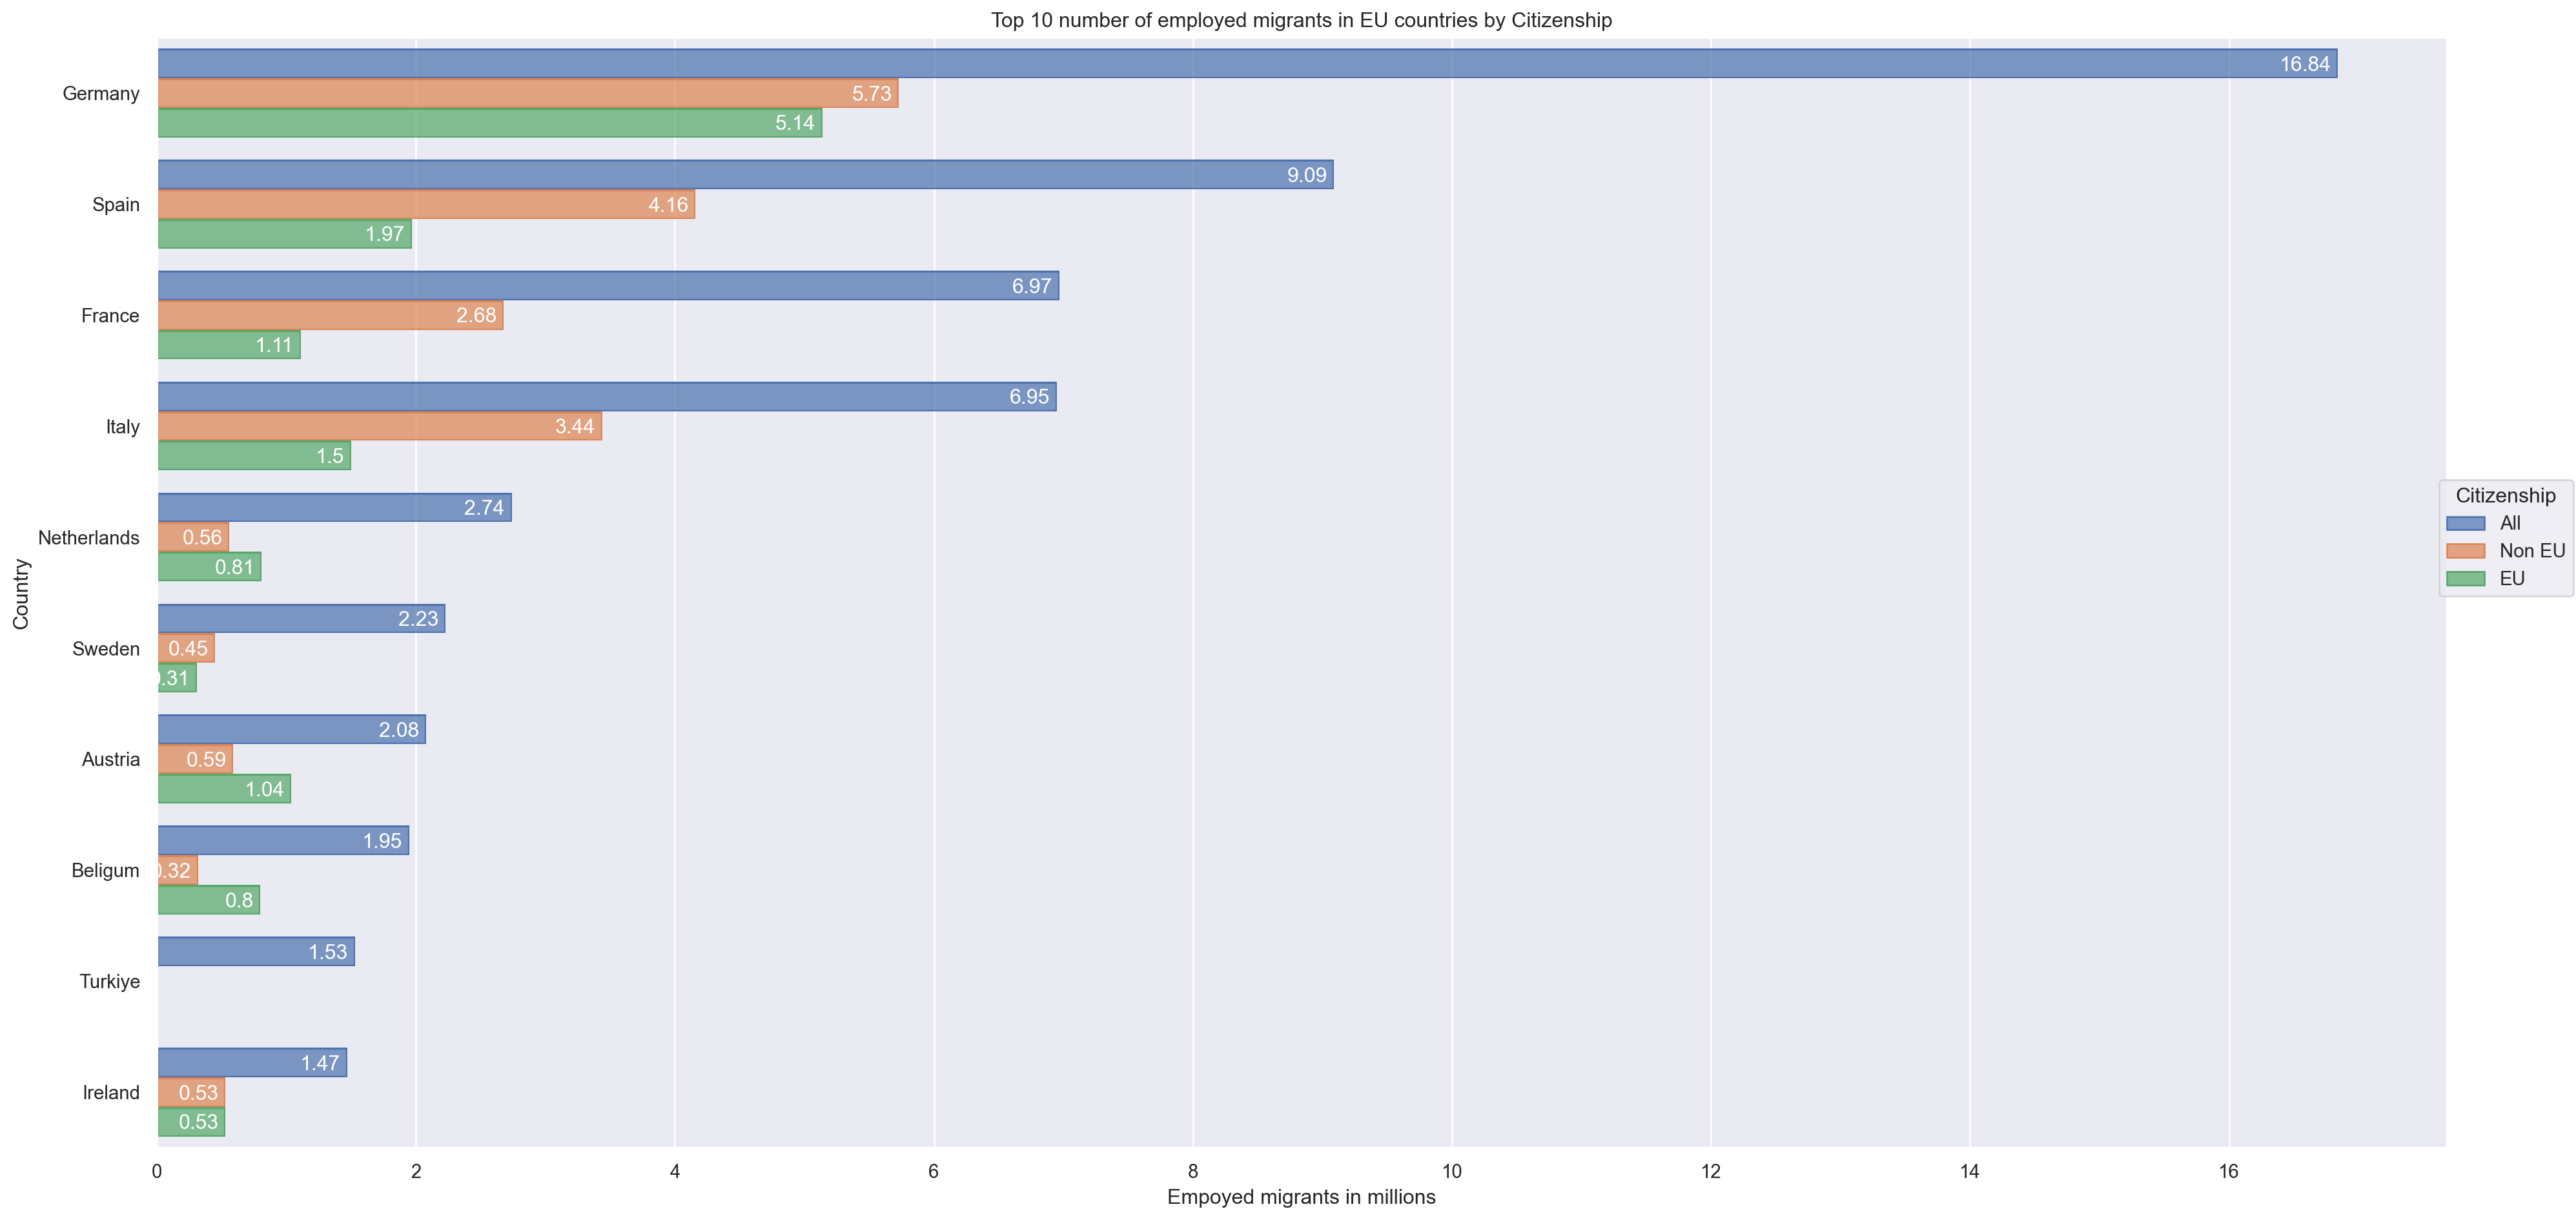

In [166]:
graph.label(title = "Top 10 number of employed migrants in EU countries by Citizenship",y="Country", x="Empoyed migrants in millions", color="Citizenship").layout(size=(20, 10))